In [44]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from scipy.integrate import odeint



In [45]:
        


def random_force_generator(n):
    force_list = {}
    x = [np.random.randint(1, 10)]

    for i in range(1, n):
        x.append(x[i - 1] + np.random.randint(1, 10))

    for i in x:
        key = np.random.randint(0, 100)  
        force_list[i % 100 + 1] = key  

    return force_list

n = 1000
result = random_force_generator(n)
print(result)
len(result)

{7: 90, 13: 64, 18: 20, 25: 78, 28: 57, 34: 76, 35: 51, 41: 79, 43: 96, 50: 59, 51: 14, 56: 90, 60: 2, 63: 75, 71: 20, 78: 32, 85: 34, 90: 74, 96: 43, 3: 22, 10: 19, 17: 21, 20: 51, 21: 27, 30: 60, 36: 17, 52: 67, 57: 62, 59: 38, 64: 75, 68: 94, 69: 73, 77: 70, 83: 73, 91: 26, 98: 86, 11: 79, 27: 39, 45: 93, 66: 53, 67: 95, 76: 84, 82: 24, 93: 45, 99: 76, 6: 58, 9: 23, 16: 3, 23: 48, 24: 74, 29: 15, 39: 59, 42: 54, 65: 70, 73: 27, 84: 90, 15: 95, 33: 67, 44: 60, 47: 22, 49: 72, 53: 93, 74: 85, 81: 40, 89: 82, 92: 84, 100: 32, 1: 81, 4: 77, 5: 40, 8: 76, 22: 38, 46: 23, 54: 77, 55: 41, 94: 16, 31: 89, 61: 20, 62: 89, 86: 50, 14: 72, 38: 82, 70: 53, 75: 30, 79: 18, 95: 4, 40: 53, 58: 4, 26: 98, 80: 62, 37: 4, 87: 27, 97: 47, 12: 10, 19: 39, 48: 28, 2: 0, 32: 22, 88: 12, 72: 34}


100

In [46]:
t_arr = np.linspace(0,100 ,300)

y_arr= []



In [47]:
def get_force(time):
    if (time in result.keys()):
        # t_arr=result.keys()
        # idx=t_arr.index(time)
        F=result[time]
        #y_arr.append(F)
    else:
        diff_arr=np.absolute(np.array(list(result.keys())) - time)
        idx=diff_arr.argmin()
        F=result[list(result.keys())[idx]]

    return F

In [48]:
f_arr = []
#f_arr = list(result.values())
time_arr = []
len(f_arr)

0

In [49]:
def dynamics_model_with_damper(X, t, M1, b1, k1, M2, b2, k2):
    
    F = get_force(t)
    
    
    dx0 = X[1]
    dx1 = -(k1+k2)*X[0]/M1 -(b1+b2)*X[1]/M1 + k2*X[2]/M1 + b2*X[3]/M1 + F/M1
    dx2  = X[3]
    dx3 = k2*X[0]/M2 + b2*X[1]/M2 - k2*X[2]/M2 - b2*X[3]/M2
    
    return [dx0, dx1, dx2, dx3]
    


# Skyscraper parameters

#[M1,b1,k1] = np.random.uniform(size = (3))  

# Tuned Mass Damper parameters
 # M2, b2, and k2 are basicall the controller paramters. Vary them and check the time response. For e.g. vary b2 between 8.9*0.05 to 8.9*10
#[M2,b2,k2] = np.random.uniform(size = (3) )



#X0 = [0,0,0,0]
#X0 = np.random.uniform(size=(4))
#X0 = np.random.uniform(size=(4))
#t_arr = np.linspace(0, 3, 1000)  #generates betwenn 0 and 3 1000 values



#X_arr = odeint(dynamics_model_with_damper, X0, t_arr, args=(M1, b1, k1, M2, b2, k2, force_arr,t_arr))



In [50]:
M = 1 #no of buildings

N = 10 # no of simulations
x_arr_list = []
sim  =  0
sim_arr = []

f_arr_desired = []
for i in range(M):
    [M1, b1, k1, M2, b2, k2] = np.random.uniform(size=(6))
    y_arr.append([M1, b1, k1, M2, b2, k2])
    X0 = np.random.uniform(size=(4))
    
    
    
    lst = []
    lst.append(X0)
    
    

    for j in range(N):
        result = random_force_generator(n)        
        X_arr = odeint(dynamics_model_with_damper, X0, t_arr, args=(M1, b1, k1, M2, b2, k2))
        x_arr_list.append(X_arr)
        f_arr  = [get_force(t) for t in t_arr]
        f_arr_desired.extend(f_arr)
        
        sim_arr.extend([(i * N + j)+1] * len(X_arr))
        
        
        # Get the final state of the current iteration
        df_final = pd.DataFrame(X_arr, columns=['x1', 'v1', 'x2', 'v2'])

        # Use the final state as initial condition for the next iteration
        
        # sim_arr.append((j+1))
df_final = pd.concat([pd.DataFrame(arr, columns=['x1', 'v1', 'x2', 'v2']) for arr in x_arr_list], ignore_index=True)
df_final['sim'] = sim_arr

In [51]:
df_final['Force'] = f_arr_desired

In [52]:
df_final

,x1,v1,x2,v2,sim,Force
0,0.032800,0.943219,0.982268,0.247163,1,31
1,3.354808,16.807280,1.343117,2.590178,1,31
2,10.163214,22.649218,2.995401,7.492951,1,31
3,17.883374,22.867658,6.384447,12.692765,1,31
4,25.165996,20.414909,11.377011,16.942633,1,31
...,...,...,...,...,...,...
2995,88.013838,-1.057382,97.363509,2.670375,10,60
2996,87.212582,-3.508133,97.781035,-0.194104,10,60
2997,85.790900,-4.845439,97.240523,-3.001947,10,60
2998,82.937856,-18.147274,95.761025,-6.345656,10,19


In [53]:

x = []
y = []                         #window shifting
for index, row in df_final.iterrows():
    
    if index >= 4 and df_final.loc[index, 'sim'] == df_final.loc[index-3, 'sim'] == df_final.loc[index-2, 'sim'] == df_final.loc[index-1, 'sim'] == df_final.loc[index, 'sim']:
        x.append([M2,b2,k2,M1,b1,k1,df_final.iloc[index-3,0],df_final.iloc[index-2,0],df_final.iloc[index-1,0],df_final.iloc[index,0],df_final.iloc[index-3,5],df_final.iloc[index-2,5],df_final.iloc[index-1,5],df_final.iloc[index,5]])
        y.append([df_final.iloc[index,2]])

In [54]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30,random_state=42,shuffle = False)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train  = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [55]:
x_test = np.array(x)
y_test = np.array(y)             #testing
x_test = scaler.transform(x_test) 

In [56]:
regressor = RandomForestRegressor(n_estimators=25, random_state=0,max_depth=20)
regressor.fit(x_train, y_train)

C:\Users\Vamsi\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(max_depth=20, n_estimators=25, random_state=0)

In [57]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


y_pred_rand=regressor.predict(x_test)
mae = mean_absolute_error(y_test, y_pred_rand)
mse = mean_squared_error(y_test, y_pred_rand)
print('mean absolute error',mae)
print('mean square error',mse)

mean absolute error 3.7725164578116996
mean square error 28.64022654166007


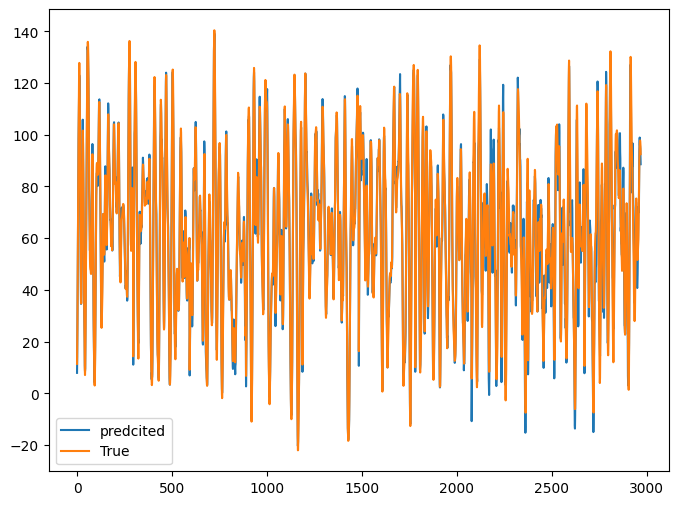

In [58]:
plt.figure(figsize=(8, 6))
plt.plot(y_pred_rand)
plt.plot(y_test)
plt.legend(['predcited','True'])

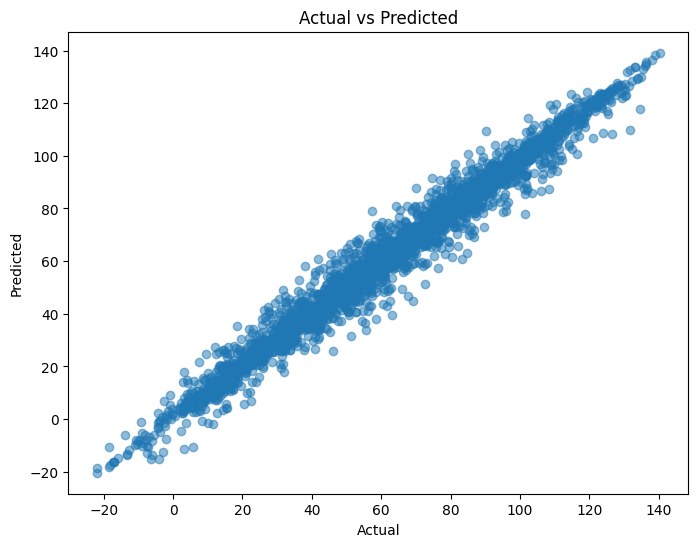

In [59]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rand, alpha=0.5)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [61]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30,random_state=42,shuffle = False)

scaler = StandardScaler()
x_train  = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [62]:
x_test = np.array(x)
y_test = np.array(y)             #testing
x_test = scaler.transform(x_test) 

In [63]:
xgbr = XGBRegressor(objective="reg:squarederror", random_state=42,max_depth=2,learning_rate =0.1)
xgbr.fit(x_train,y_train)
print(xgbr)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)


In [64]:
xgbr.fit(x_train,y_train)
score = xgbr.score(x_train,y_train)
print("training score =  ",score)



training score =   0.9458599247527547


In [65]:
y_pred_xgb = xgbr.predict(x_test)


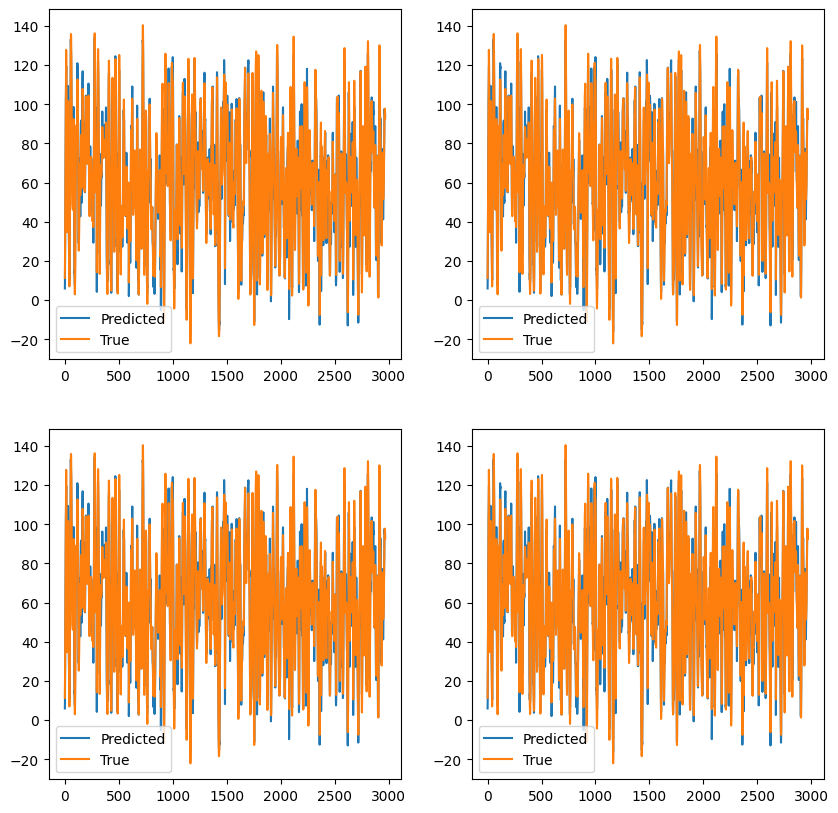

In [66]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.plot(y_pred_xgb)
    plt.plot(y_test)
    plt.legend(["Predicted", "True"])
plt.show()
